In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
len(df)

20640

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


In [5]:
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']]

&nbsp;

&nbsp;

# Data Preparation

- Select only the features from above and fill in the missing values with 0.
- Create a new column `rooms_per_household` by dividing the `column total_rooms` by the column `households` from dataframe.
- Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.
- Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.

&nbsp;

1. **Select only the features from above and fill in the missing values with 0**

In [6]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df = df.fillna(0)

In [8]:
df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

***

&nbsp;

2. **Create a new column** `rooms_per_household` **by dividing the column** `total_rooms` **by the column** `households` **from dataframe.**

In [9]:
df["rooms_per_household"] = df.total_rooms / df.households

In [10]:
df[["rooms_per_household", "total_rooms", "households"]]

,rooms_per_household,total_rooms,households
0,6.984127,880.0,126.0
1,6.238137,7099.0,1138.0
2,8.288136,1467.0,177.0
3,5.817352,1274.0,219.0
4,6.281853,1627.0,259.0
...,...,...,...
20635,5.045455,1665.0,330.0
20636,6.114035,697.0,114.0
20637,5.205543,2254.0,433.0
20638,5.329513,1860.0,349.0


***

&nbsp;

3. **Create a new column** `bedrooms_per_room` **by dividing the column** `total_bedrooms` **by the column** `total_rooms` **from dataframe.**

In [11]:
df["bedrooms_per_room"] = df.total_bedrooms / df.total_rooms
df[["bedrooms_per_room", "total_bedrooms", "total_rooms"]]

,bedrooms_per_room,total_bedrooms,total_rooms
0,0.146591,129.0,880.0
1,0.155797,1106.0,7099.0
2,0.129516,190.0,1467.0
3,0.184458,235.0,1274.0
4,0.172096,280.0,1627.0
...,...,...,...
20635,0.224625,374.0,1665.0
20636,0.215208,150.0,697.0
20637,0.215173,485.0,2254.0
20638,0.219892,409.0,1860.0


***

&nbsp;

4. **Create a new column** `population_per_household` **by dividing the column** `population` **by the column** `households` **from dataframe.**

In [12]:
df["population_per_household"] = df.population / df.households
df[["population_per_household", "population", "households"]]

,population_per_household,population,households
0,2.555556,322.0,126.0
1,2.109842,2401.0,1138.0
2,2.802260,496.0,177.0
3,2.547945,558.0,219.0
4,2.181467,565.0,259.0
...,...,...,...
20635,2.560606,845.0,330.0
20636,3.122807,356.0,114.0
20637,2.325635,1007.0,433.0
20638,2.123209,741.0,349.0


&nbsp;

&nbsp;

***

# Question 1

**What is the most frequent observation (mode) for the column ocean_proximity?**

Options:

- NEAR BAY
- **<1H OCEAN**
- INLAND
- NEAR OCEAN

In [13]:
df["ocean_proximity"].mode()

0    <1h_ocean
Name: ocean_proximity, dtype: object

&nbsp;

&nbsp;

&nbsp;

&nbsp;

***

# Q2

1. Create the correlation matrix for the numerical features of your train dataset.
2. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

**What are the two features that have the biggest correlation in this dataset?**

Options:

- **`total_bedrooms` and `households`**
- `total_bedrooms` and `total_rooms`
- `population` and `households`
- `population_per_household` and `total_rooms`

<AxesSubplot:>

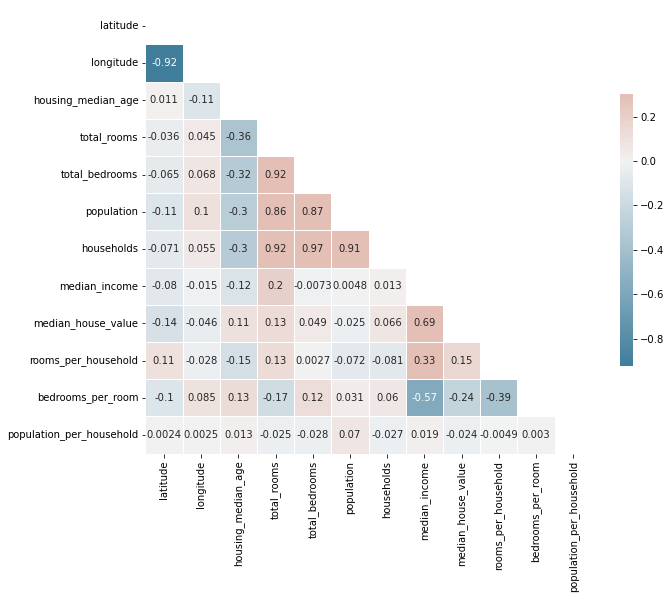

In [14]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

&nbsp;

&nbsp;

***

# Make `median_house_value` binary

We need to turn `the median_house_value` variable from numeric into binary.
Let's create a variable `above_average` which is 1 if the `median_house_value` is above its mean value and 0 otherwise.

In [15]:
mean_value = df.median_house_value.mean()
mean_value

206855.81690891474

In [16]:
condlist = [(df.median_house_value > mean_value)]

choicelist = [1]

default = 0

df["bin_mean_val"] = np.select(condlist, choicelist, default)

In [17]:
df1 = df.copy()
df = df.drop(["median_house_value"], axis=1)
df.rename(columns={'bin_mean_val':'median_house_value'}, inplace=True)
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,near_bay,6.984127,0.146591,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,near_bay,6.238137,0.155797,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,near_bay,8.288136,0.129516,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,near_bay,5.817352,0.184458,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,near_bay,6.281853,0.172096,2.181467,1


#### Other if statements

### 1. `if` condition with `loc`

```python

df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

``` 

&nbsp;

**Example:**

```python
df.loc[df['median_house_value'] <= mean_val, "bin_median_house_val"] = 0 
df.loc[df['median_house_value'] > mean_val, "bin_median_house_val"] = 1
#"bin_median_house_val" will be the new column with 0 and 1 values
``` 

### 2. `if` condition with `lambda` 

```python

df['new column name'] = df['column name'].apply(lambda x: 
                                                'value if condition is met' if x condition 
                                                else 'value if condition is not met')

```

**Example:**
```python
df['bin_median_house_value'] = df['median_house_value'].apply(lambda x: 1 if 
                                                              df['median_house_value'] > mean_val 
                                                              else 0)
```

### 3. `if` with `and/or` condition

```python 

df.loc[(df['A'] == 'One') | (df['A'] == 'Two'), 'new_column'] = True  # | is OR
df.loc[(df['A'] != 'One') & (df['A'] != 'Two'), 'new_column'] = False  # & is AND

``` 

&nbsp;

&nbsp;

&nbsp;

***

# Split data

- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split function`) and set the seed to 42.
- Make sure that the target value (`median_house_value`) is not in your dataframe.

In [18]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train, df_val = train_test_split(df_train_full, test_size=0.2, random_state=42)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value'] 
del df_test['median_house_value']

&nbsp;

&nbsp;

***

# Q3

1. Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.

**What is the value of mutual information?**
Round it to 2 decimal digits using round(score, 2)

Options:

- 0.26
- 0
- **0.10**
- 0.16

In [19]:
from sklearn.metrics import mutual_info_score

score = mutual_info_score(y_train, df_train.ocean_proximity)
round(score, 2)

0.1

&nbsp;

&nbsp;

***

# Q4

Now let's train a logistic regression


**1.** Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.

**2.** Fit the model on the training dataset.

**3.** To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:


```python 
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
```


**4.** Calculate the accuracy on the validation dataset and round it to 2 decimal digits.


Options:

- 0.60
- 0.72
- **0.84**
- 0.95

&nbsp;

### Step 1: Separate categorical from numerical features

In [20]:
categorical = ['ocean_proximity']

numerical = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
             'total_bedrooms', 'population', 'households', 'median_income',
             'rooms_per_household', 'bedrooms_per_room',
             'population_per_household']

&nbsp;

### Step 2: Vectorize features

In [21]:
from sklearn.feature_extraction import DictVectorizer

train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

&nbsp;

### Step 3: Instantiate and fit model

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

&nbsp;

### Step 4: Validation: Comparison with `y_val`

In [23]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

In [24]:
decision = (y_pred >= 0.5)

In [25]:
(y_val == decision).mean()

0.8292461398728429

The model is correct in 83% times

In [26]:
y_pred

array([0.07124041, 0.20004836, 0.95086547, ..., 0.3437956 , 0.65138885,
       0.33102576])

In [27]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = decision.astype(int)
df_pred['actual'] = y_val

In [28]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [29]:
df_pred

,probability,prediction,actual,correct
0,0.071240,0,0,True
1,0.200048,0,0,True
2,0.950865,1,1,True
3,0.494614,0,1,False
4,0.981587,1,1,True
...,...,...,...,...
3298,0.102648,0,0,True
3299,0.003834,0,0,True
3300,0.343796,0,1,False
3301,0.651389,1,0,False


&nbsp;

### Step 5: Score the model

In [30]:
df_pred.correct.mean()

0.8292461398728429

In [31]:
decision.astype(int)

array([0, 0, 1, ..., 0, 1, 0])

In [32]:
model.score(X_val,y_val)

0.8292461398728429

&nbsp;

&nbsp;

***

# Q5

Let's find the **least useful feature** using the **feature elimination technique**.

- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.


Which of following feature has the smallest difference?

- **total_rooms**
- total_bedrooms
- population
- households

**Note:** the difference doesn't have to be positive

In [33]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'bedrooms_per_room': 0.975,
 'households': 0.004,
 'housing_median_age': 0.036,
 'latitude': 0.133,
 'longitude': 0.092,
 'median_income': 1.237,
 'ocean_proximity=<1h_ocean': 0.396,
 'ocean_proximity=inland': -1.907,
 'ocean_proximity=island': 0.1,
 'ocean_proximity=near_bay': 0.177,
 'ocean_proximity=near_ocean': 0.897,
 'population': -0.002,
 'population_per_household': 0.01,
 'rooms_per_household': -0.005,
 'total_bedrooms': 0.001,
 'total_rooms': -0.0}

&nbsp;

&nbsp;

# Feature selection with `FRE` (recursive feature elimination)

**From sklearn documentation:**

Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [34]:
from sklearn.feature_selection import RFE
rfe = RFE(model, n_features_to_select=10, step=1)
# running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

In [35]:
rfe.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False])

In [36]:
rfe.ranking_

array([1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 2, 6, 7])

In [37]:
list(zip(dv.get_feature_names_out(), rfe.support_, rfe.ranking_))

[('bedrooms_per_room', True, 1),
 ('households', False, 4),
 ('housing_median_age', True, 1),
 ('latitude', True, 1),
 ('longitude', True, 1),
 ('median_income', True, 1),
 ('ocean_proximity=<1h_ocean', True, 1),
 ('ocean_proximity=inland', True, 1),
 ('ocean_proximity=island', True, 1),
 ('ocean_proximity=near_bay', True, 1),
 ('ocean_proximity=near_ocean', False, 3),
 ('population', False, 5),
 ('population_per_household', True, 1),
 ('rooms_per_household', False, 2),
 ('total_bedrooms', False, 6),
 ('total_rooms', False, 7)]

&nbsp;

&nbsp;

***

# Q6

For this question, we'll see how to use a linear regression model from Scikit-Learn.

We'll need to use the original column `'median_house_value'`. 

**1.** Apply the logarithmic transformation to this column.

**2.** Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.

**3.** This model has a parameter alpha. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`

Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.

Options:

- 0
- **0.01**
- 0.1
- 1
- 10

In [38]:
df1["median_house_value"] = np.log1p(df1["median_house_value"])

In [40]:
from sklearn.linear_model import Ridge

df1_train_full, df1_test = train_test_split(df1, test_size=0.2, random_state=42)
df1_train, df1_val = train_test_split(df1_train_full, test_size=0.2, random_state=42)

y1_train = df1_train.median_house_value.values
y1_val = df1_val.median_house_value.values
y1_test = df1_test.median_house_value.values

del df1_train['median_house_value']
del df1_val['median_house_value'] 
del df1_test['median_house_value']

train1_dict = df1_train[categorical + numerical].to_dict(orient='records')

dv1= DictVectorizer(sparse=False)
dv1.fit(train1_dict)

X1_train = dv.transform(train1_dict)

val1_dict = df1_val[categorical + numerical].to_dict(orient='records')
X1_val = dv1.transform(val1_dict)

In [57]:
from sklearn.metrics import mean_squared_error

values = [0, 0.01, 0.1, 1, 10]

for i in values:
    model_reg = Ridge(alpha=i, solver="sag", random_state=42)
    model_reg.fit(X1_train, y1_train)
    y1_pred = model_reg.predict(X1_val)
    print(round(mean_squared_error(y1_val, y1_pred, squared=False), 3)) 
          
#squared = False is equal to RMSE

0.523
0.523
0.523
0.523
0.523


&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;